In [1]:
import pandas as pd

import numpy as np

import datetime

import my_funcs

# Updating and populating the OUTPUTS folder

In [3]:
# my_funcs.ETL()

# after running the ETL, the updated files will be available in data/outputs/

## First Level

In [2]:
# Demographics
demo = my_funcs.load_demo()
demo.head()

,household_key,age_45+,income_50K+,single_couple_family,has_kids,single,couple
0,1,1,0,2,0,0,1
1,7,1,1,2,0,0,1
2,8,0,0,3,1,0,0
3,13,0,1,3,1,0,0
4,16,1,1,1,0,1,0


In [3]:
# Transactions/Products
merged = my_funcs.load_merged()
merged.head()

,household_key,BASKET_ID,DAY,PRODUCT_ID,QUANTITY,SALES_VALUE,STORE_ID,RETAIL_DISC,TRANS_TIME,WEEK_NO,COUPON_DISC,COUPON_MATCH_DISC,datetime,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,Section Labels
0,2319,28179463886,101,909714,1,0.79,427,0.0,119,15,0.0,0.0,2004-07-01 01:19:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG),produce
1,243,28197355878,102,909714,1,0.72,323,0.0,1011,15,0.0,0.0,2004-07-02 10:11:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG),produce
2,707,28210545743,103,909714,1,2.35,429,0.0,1119,15,0.0,0.0,2004-07-03 11:19:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG),produce
3,329,28210628714,103,909714,1,2.10,450,0.0,2037,15,0.0,0.0,2004-07-03 20:37:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG),produce
4,1029,28210676830,103,909714,1,0.81,329,0.0,1148,15,0.0,0.0,2004-07-03 11:48:00,2,PRODUCE,National,APPLES,APPLES GRANNY SMITH (BULK&BAG),produce


## Second Level

In [4]:
# Customer Profiles
hh_agg = my_funcs.load_hh_agg(merged)

In [5]:
hh_agg.shape

(2469, 31)

In [6]:
hh_agg.set_index('household_key')

,total_spend,total_loyalty,total_coupon,total_quantity,num_baskets,unique_products,first_purchase,last_purchase,avg_basket_spend,avg_item_cost,...,junk_food,kitchen,meat,misc,produce,seasonal,R,F,M,RFM
household_key,,,,,,,,,,,,,,,,,,,,,
243,4120.07,-642.14,-25.65,1901,81,655,101,706,50.865062,2.167317,...,764.02,1.59,379.04,303.82,477.82,0.00,2,5,2,9
707,1954.34,-333.50,0.00,833,45,545,103,668,43.429778,2.346146,...,255.63,7.98,277.78,139.88,212.41,6.99,5,5,3,13
329,2633.20,-667.59,-19.80,1589,46,513,113,703,57.243478,1.657143,...,508.39,0.00,814.45,198.42,261.44,1.99,3,5,2,10
1029,1200.11,-115.65,0.00,382,30,164,104,627,40.003667,3.141649,...,261.64,0.00,135.09,60.13,18.71,0.00,5,5,4,14
1975,695.32,-94.48,0.00,224,36,182,111,703,19.314444,3.104107,...,34.12,3.99,154.29,81.88,12.64,1.29,3,5,4,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2409,1409.96,-197.28,0.00,583,25,336,104,687,56.398400,2.418456,...,282.22,1.59,259.50,67.81,81.64,26.70,4,1,4,9
954,4309.24,-1046.35,-17.65,1991,113,877,116,704,38.134867,2.164360,...,700.32,2.99,878.13,300.28,332.41,0.00,3,2,2,7
650,2043.00,-427.91,-0.45,1125,50,550,103,682,40.860000,1.816000,...,381.77,0.00,469.72,164.51,197.10,0.00,4,3,3,10


In [7]:
campaign_summary = my_funcs.load_campaign_summary(merged)
campaign_summary

,First Day,Last Day,Duration,Listed Products,Section Label Counts,Listed Products Total Sales,Listed Products Sales Before,Listed Products Sales During,Listed Products Sales After,avg. total,avg. before,avg. during,avg. after,first,last
1,346,383,38,"[28929, 29096, 32387, 32805, 33198, 34180, 343...","{'dairy': 13496, 'produce': 7565, 'beverages':...",56764.87,21854.53,4145.12,30765.22,92.904861,88.839553,109.082105,93.511307,346.0,383.0
2,351,383,33,"[49910, 61481, 61509, 67573, 80730, 82937, 857...","{'produce': 5763, 'grocery': 2952, 'junk_food'...",47328.04,19708.03,2713.86,24906.15,77.459967,78.518048,82.238182,75.702584,351.0,383.0
3,356,412,57,"[34214, 70714, 70714, 71794, 72290, 72290, 723...","{'produce': 7634, 'misc': 6177, 'home_family':...",43048.29,18001.12,4418.59,20628.58,70.455466,70.316875,77.519123,68.761933,356.0,412.0
4,372,404,33,"[27160, 29977, 31349, 32491, 64543, 68122, 711...","{'misc': 6670, 'grain_goods': 4923, 'dairy': 1...",35052.42,16032.94,1858.32,17161.16,57.368936,58.944632,56.312727,55.718052,372.0,404.0
5,377,411,35,"[65969, 66323, 67208, 67481, 67676, 69613, 697...","{'home_family': 11490, 'misc': 204, 'grocery':...",29422.53,15473.52,1827.91,12121.1,48.154714,55.861083,52.226000,40.269435,377.0,411.0
6,393,425,33,"[13005962, 13007355, 13007356, 13007435, 13007...",{'dairy': 822},1990.16,320.94,155.72,1513.5,3.257218,1.095358,4.718788,5.273519,393.0,425.0
7,398,432,35,"[73428, 74892, 80493, 80553, 110801, 558298, 8...","{'home_family': 2290, 'drug': 608, 'meat': 358...",14204.37,6429.74,761.44,7013.19,23.247741,21.576309,21.755429,25.047107,398.0,432.0
8,412,460,49,"[1062425, 5581193, 903261, 2081690, 1096556, 9...","{'meat': 255509, 'produce': 213135, 'dairy': 1...",2488944.65,1256340.6,208783.5,1023820.55,4073.559165,4026.732692,4260.887755,4062.779960,412.0,460.0
9,435,467,33,"[27754, 28929, 29096, 29340, 30699, 31999, 341...","{'grain_goods': 12302, 'beverages': 5873, 'dai...",106644.48,54817.54,6068.44,45758.5,174.540884,163.634448,183.892121,186.769388,435.0,467.0
10,463,495,33,"[33555, 55021, 59433, 60997, 61750, 64322, 128...","{'home_family': 9918, 'misc': 206, 'grain_good...",37786.25,24387.79,1777.03,11621.43,61.843290,67.183994,53.849394,53.554977,463.0,495.0


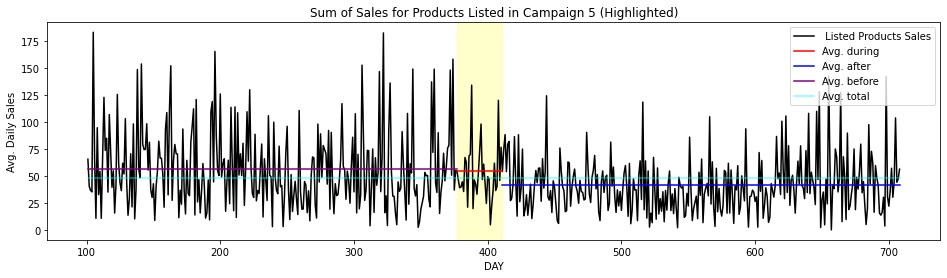

In [11]:
my_funcs.plot_campaign_sales(campaign_summary.T, 5, merged) ## NOTE THAT THIS TABLE IS .T